In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision.models as models
from torchvision.models.segmentation import FCN_ResNet50_Weights
import torch.nn as nn
import os
from PIL import Image
import torch
import cv2

In [ ]:
 #defining unet model architecture

def unet(input_size=(256, 256, 3)):
    inputs = Input(input_size)
    
    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = BatchNormalization()(c1)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    c1 = BatchNormalization()(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = BatchNormalization()(c2)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    c2 = BatchNormalization()(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = BatchNormalization()(c3)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    c3 = BatchNormalization()(c3)
    p3 = MaxPooling2D((2, 2))(c3)
    
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = BatchNormalization()(c4)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    c4 = BatchNormalization()(c4)
    p4 = MaxPooling2D((2, 2))(c4)
    
    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = BatchNormalization()(c5)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)
    c5 = BatchNormalization()(c5)
    
    # Decoder
    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = BatchNormalization()(c6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)
    c6 = BatchNormalization()(c6)
    
    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = BatchNormalization()(c7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)
    c7 = BatchNormalization()(c7)
    
    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = BatchNormalization()(c8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)
    c8 = BatchNormalization()(c8)
    
    u9 = UpSampling2D((2, 2))(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = BatchNormalization()(c9)
    c9 = Dropout(0.1)(c9)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    
    model = Model(inputs, outputs, name="U-NET")
    return model

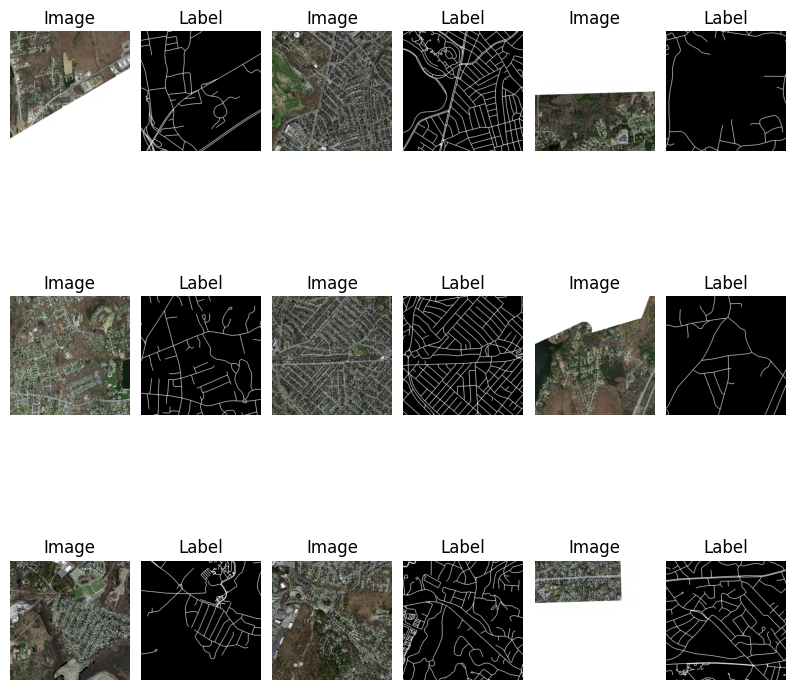

cuda
Epoch 1/15, Loss: 0.2088
Best model saved with loss: 0.2088
Epoch 2/15, Loss: 0.1437
Best model saved with loss: 0.1437
Epoch 3/15, Loss: 0.1340
Best model saved with loss: 0.1340
Epoch 4/15, Loss: 0.1285
Best model saved with loss: 0.1285
Epoch 5/15, Loss: 0.1241
Best model saved with loss: 0.1241
Epoch 6/15, Loss: 0.1208
Best model saved with loss: 0.1208
Epoch 7/15, Loss: 0.1178
Best model saved with loss: 0.1178
Epoch 8/15, Loss: 0.1140
Best model saved with loss: 0.1140
Epoch 9/15, Loss: 0.1121
Best model saved with loss: 0.1121
Epoch 10/15, Loss: 0.1088
Best model saved with loss: 0.1088
Epoch 11/15, Loss: 0.1061
Best model saved with loss: 0.1061
Epoch 12/15, Loss: 0.1036
Best model saved with loss: 0.1036
Epoch 13/15, Loss: 0.1023
Best model saved with loss: 0.1023
Epoch 14/15, Loss: 0.1002
Best model saved with loss: 0.1002
Epoch 15/15, Loss: 0.0988
Best model saved with loss: 0.0988


In [ ]:
# Function to define U-Net architecture
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout, BatchNormalization
from tensorflow.keras.models import Model

def unet(input_size=(512, 512, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = BatchNormalization()(c1)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    c1 = BatchNormalization()(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = BatchNormalization()(c2)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    c2 = BatchNormalization()(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = BatchNormalization()(c3)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    c3 = BatchNormalization()(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = BatchNormalization()(c4)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    c4 = BatchNormalization()(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = BatchNormalization()(c5)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)
    c5 = BatchNormalization()(c5)

    # Decoder
    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = BatchNormalization()(c6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)
    c6 = BatchNormalization()(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = BatchNormalization()(c7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)
    c7 = BatchNormalization()(c7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = BatchNormalization()(c8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)
    c8 = BatchNormalization()(c8)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = BatchNormalization()(c9)
    c9 = Dropout(0.1)(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs, outputs)
    return model


# Function to wrap U-Net in PyTorch (you need torch-based U-Net implementation)
import segmentation_models_pytorch as smp

def create_unet_model():
    model = smp.Unet(
        encoder_name="resnet50",        # backbone
        encoder_weights="imagenet",     # pretrained weights
        in_channels=3,                  # input channels
        classes=1                       # output channels
    )
    return model

# Initialize U-Net model
model = create_unet_model()

# Set device to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(device)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Function to train the model
def train_model(num_epochs):
    best_loss = float("inf")

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, masks in train_loader:
            images = images.to(device)
            masks = masks.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

        # Save the best model
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            torch.save(model.state_dict(), "best_model.pth")
            print(f"Best model saved with loss: {best_loss:.4f}")

# Train the model
train_model(15)


C:\Users\Koushik\AppData\Local\Temp\ipykernel_16012\454162327.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth", map_loc

RuntimeError: Error(s) in loading state_dict for FCN:
	Unexpected key(s) in state_dict: "aux_classifier.0.weight", "aux_classifier.1.weight", "aux_classifier.1.bias", "aux_classifier.1.running_mean", "aux_classifier.1.running_var", "aux_classifier.1.num_batches_tracked", "aux_classifier.4.weight", "aux_classifier.4.bias". 

C:\Users\Koushik\AppData\Local\Temp\ipykernel_16012\824324978.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


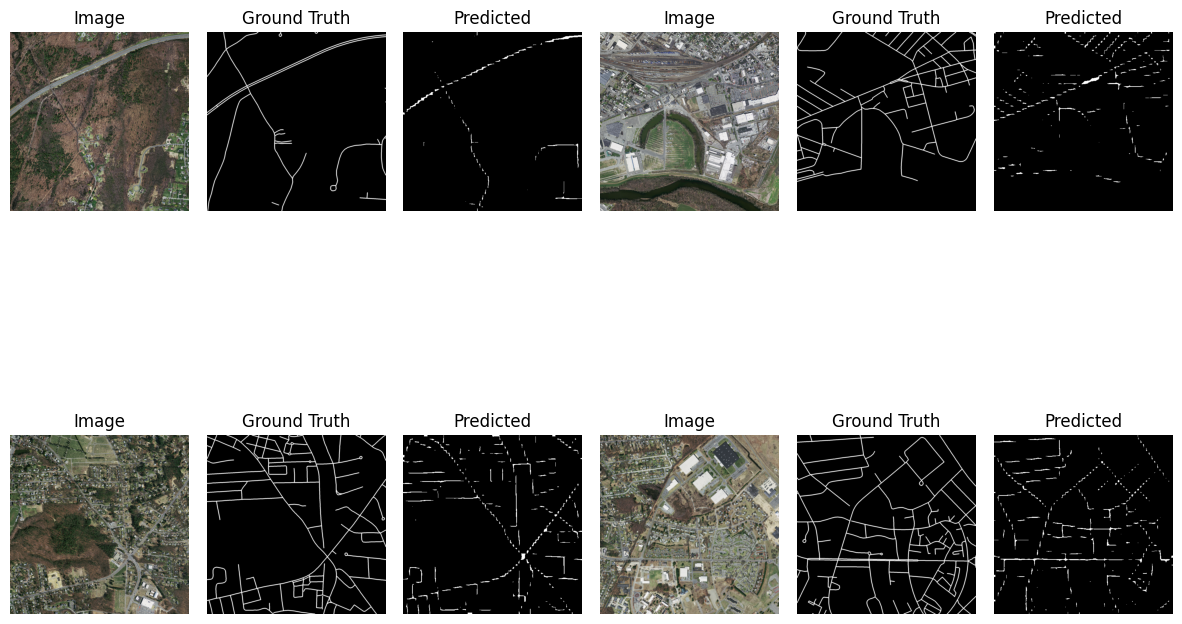

In [ ]:
# --- Test Setup for U-Net Model ---
test_image_dir = r"D:\sama\tiff\test"
test_mask_dir = r"D:\sama\tiff\test_labels"
test_dataset = RoadSegmentationDataset(image_dir=test_image_dir, mask_dir=test_mask_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

# Define your PyTorch U-Net model (must match the one used in training)
# Example structure:
class UNet(nn.Module):
    def __init__(self, n_channels=3, n_classes=1):
        super(UNet, self).__init__()
        # Define U-Net blocks (same as in your training code)
        # Add your full architecture here...

    def forward(self, x):
        # Define the forward pass
        return self.out_conv(...)  # final output layer

# Initialize U-Net and load trained weights
model = UNet(n_channels=3, n_classes=1)  # adjust if needed
model.load_state_dict(torch.load('best_model.pth', map_location=device))
model.to(device)
model.eval()

# --- Visualization Function ---
def plot_examples(rows=2, cols=2):
    fig, axs = plt.subplots(nrows=rows, ncols=cols * 3, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    for i in range(rows):
        for j in range(cols):
            idx = i * cols + j
            img, gt_mask = test_dataset[idx]
            img_input = img.unsqueeze(0).to(device)
            gt_mask_np = gt_mask.squeeze().cpu().numpy()

            # Get prediction
            with torch.no_grad():
                pred = model(img_input)
                pred = torch.sigmoid(pred).cpu().numpy()[0, 0]
                pred_mask = (pred > 0.5).astype(np.uint8)

            img_np = img.squeeze(0).cpu().numpy().transpose(1, 2, 0)

            axs[i, j*3].imshow(img_np)
            axs[i, j*3].axis('off')
            axs[i, j*3].set_title('Image')

            axs[i, j*3+1].imshow(gt_mask_np, cmap='gray')
            axs[i, j*3+1].axis('off')
            axs[i, j*3+1].set_title('Ground Truth')

            axs[i, j*3+2].imshow(pred_mask, cmap='gray')
            axs[i, j*3+2].axis('off')
            axs[i, j*3+2].set_title('Predicted')

    plt.show()

# Plot predictions
plot_examples()


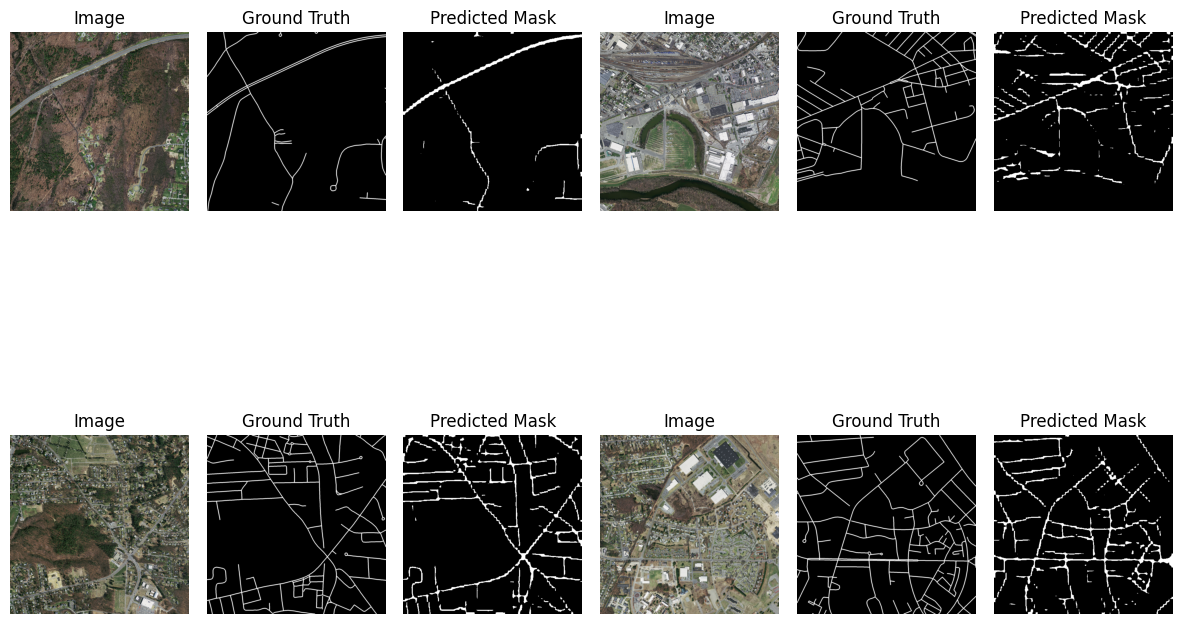

In [ ]:
# --- Test Setup for U-Net Model ---
test_image_dir = r"D:\sama\tiff\test"
test_mask_dir = r"D:\sama\tiff\test_labels"
test_dataset = RoadSegmentationDataset(image_dir=test_image_dir, mask_dir=test_mask_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

# Define your PyTorch U-Net model (must match the one used in training)
# Example structure:
class UNet(nn.Module):
    def __init__(self, n_channels=3, n_classes=1):
        super(UNet, self).__init__()
        # Define U-Net blocks (same as in your training code)
        # Add your full architecture here...

    def forward(self, x):
        # Define the forward pass
        return self.out_conv(...)  # final output layer

# Initialize U-Net and load trained weights
model = UNet(n_channels=3, n_classes=1)  # adjust if needed
model.load_state_dict(torch.load('best_model.pth', map_location=device))
model.to(device)
model.eval()

# --- Visualization Function ---
def plot_examples(rows=2, cols=2):
    fig, axs = plt.subplots(nrows=rows, ncols=cols * 3, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    for i in range(rows):
        for j in range(cols):
            idx = i * cols + j
            img, gt_mask = test_dataset[idx]
            img_input = img.unsqueeze(0).to(device)
            gt_mask_np = gt_mask.squeeze().cpu().numpy()

            # Get prediction
            with torch.no_grad():
                pred = model(img_input)
                pred = torch.sigmoid(pred).cpu().numpy()[0, 0]
                pred_mask = (pred > 0.3).astype(np.uint8)

            img_np = img.squeeze(0).cpu().numpy().transpose(1, 2, 0)

            axs[i, j*3].imshow(img_np)
            axs[i, j*3].axis('off')
            axs[i, j*3].set_title('Image')

            axs[i, j*3+1].imshow(gt_mask_np, cmap='gray')
            axs[i, j*3+1].axis('off')
            axs[i, j*3+1].set_title('Ground Truth')

            axs[i, j*3+2].imshow(pred_mask, cmap='gray')
            axs[i, j*3+2].axis('off')
            axs[i, j*3+2].set_title('Predicted')

    plt.show()

# Plot predictions
plot_examples()


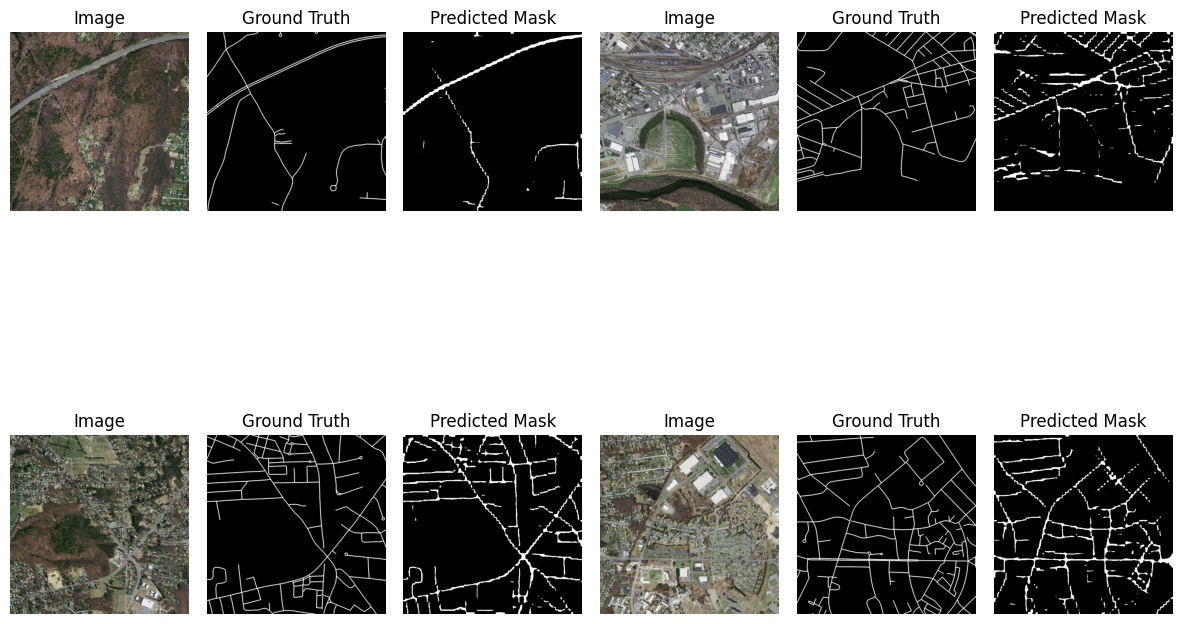

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models.segmentation import FCN_ResNet50_Weights
test_image_dir = r"D:\dv\New folder\test"
test_mask_dir = r"D:\dv\New folder\test_labels"
test_dataset = RoadSegmentationDataset(image_dir=test_image_dir, mask_dir=test_mask_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)
# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to create the UNet model with ResNet-50 backbone
def create_unet_resnet50(pretrained=True, num_classes=1):
    # Choose the weights
    weights = FCN_ResNet50_Weights.DEFAULT if pretrained else None
    model = models.segmentation.fcn_resnet50(weights=weights)
    
    # Modify the classifier layer for your number of output classes
    model.classifier[4] = nn.Conv2d(512, num_classes, kernel_size=1)
    return model

# Initialize the model with pretrained weights
model = create_unet_resnet50(pretrained=True, num_classes=1).to(device)

# Load the best model weights safely
model.load_state_dict(torch.load('best_model.pth', map_location=device, weights_only=True), strict=False)

# Function to plot example images, ground truth masks, and predicted masks
def plot_examples(test_dataset, rows=2, cols=2):
    model.eval()  # Set model to evaluation mode
    fig, axs = plt.subplots(nrows=rows, ncols=cols*3, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    for i in range(rows):
        for j in range(cols):
            # Load image and label (assuming test_dataset is defined)
            img, gt_mask = test_dataset[i * cols + j]
            img = img.unsqueeze(0).to(device)  # Add batch dimension
            gt_mask = gt_mask.squeeze().cpu().numpy()  # Convert to NumPy array

            # Get model prediction
            with torch.no_grad():
                pred_mask = model(img)['out']
                pred_mask = torch.sigmoid(pred_mask).cpu().numpy()[0, 0]  # Apply sigmoid & remove batch dim
                pred_mask = (pred_mask > 0.2).astype(np.uint8)  # Convert to binary mask

            img = img.squeeze(0).cpu().numpy().transpose(1, 2, 0)  # Convert back to image format

            # Display image
            axs[i, j*3].imshow(img)
            axs[i, j*3].axis('off')
            axs[i, j*3].set_title('Image')

            # Display ground truth mask
            axs[i, j*3+1].imshow(gt_mask, cmap='gray')
            axs[i, j*3+1].axis('off')
            axs[i, j*3+1].set_title('Ground Truth')

            # Display predicted mask
            axs[i, j*3+2].imshow(pred_mask, cmap='gray')
            axs[i, j*3+2].axis('off')
            axs[i, j*3+2].set_title('Predicted Mask')

    plt.show()

# Example Usage (assuming test_dataset is already defined)
plot_examples(test_dataset)


In [2]:
class RoadSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = sorted(os.listdir(image_dir))
        self.masks = sorted(os.listdir(mask_dir))  # Assuming filenames match exactly

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        mask_name = self.masks[idx]  # Assuming masks correspond exactly to images

        img_path = os.path.join(self.image_dir, img_name)
        mask_path = os.path.join(self.mask_dir, mask_name)

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Convert to grayscale

        # Resize images and masks to 512x512
        image = image.resize((512, 512))
        mask = mask.resize((512, 512))

        if self.transform:
            image = self.transform(image)
            mask = transforms.ToTensor()(mask)  # Convert mask separately

        return image, mask

# Transformation to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [6]:
 from PIL import Image
import os

def convert_to_tiff(image_path):
    # Load image
    image = Image.open(image_path).convert("RGB")

    # Get directory and filename without extension
    dir_name, file_name = os.path.split(image_path)
    file_base, _ = os.path.splitext(file_name)

    # Create a new folder "TIFF_Images" in the same directory
    tiff_folder = os.path.join(dir_name, "TIFF_Images")
    os.makedirs(tiff_folder, exist_ok=True)  # Create folder if it doesn't exist

    # Generate TIFF file path inside the new folder
    tiff_image_path = os.path.join(tiff_folder, f"{file_base}.tiff")

    # Save as TIFF format with LZW compression
    image.save(tiff_image_path, format="TIFF", compression="tiff_lzw")
    
    print(f"Image converted and saved at: {tiff_image_path}")

# Convert your image
image_path = r"D:\koushik\roadroad.jpeg"
convert_to_tiff(image_path)


Image converted and saved at: D:\koushik\TIFF_Images\roadroad.tiff


In [8]:
from PIL import Image, ImageEnhance
import PIL.ImageOps

# Load the uploaded image
image_path = r"D:\koushik\TIFF_Images\roadroad1.tiff"
image = Image.open(image_path)

# Enhance sharpness and contrast to improve clarity
sharpness_enhancer = ImageEnhance.Sharpness(image)
image_sharpened = sharpness_enhancer.enhance(2.0)  # Increase sharpness

contrast_enhancer = ImageEnhance.Contrast(image_sharpened)
image_enhanced = contrast_enhancer.enhance(1.5)  # Increase contrast

# Save the enhanced image
enhanced_image_path =  r"D:\koushik\TIFF_Images\roadroad11.tiff"
image_enhanced.save(enhanced_image_path)

# Return the path to the enhanced image
enhanced_image_path


'D:\\koushik\\TIFF_Images\\roadroad11.tiff'

In [22]:
from PIL import Image
import os

def convert_to_tiff(image_path):
    # Load image
    image = Image.open(image_path).convert("RGB")

    # Get directory and filename without extension
    dir_name, file_name = os.path.split(image_path)
    file_base, _ = os.path.splitext(file_name)

    # Generate TIFF file path in the same folder
    tiff_image_path = os.path.join(dir_name, f"{file_base}.tiff")

    # Save as TIFF format with LZW compression
    image.save(tiff_image_path, format="TIFF", compression="tiff_lzw")
    
    print(f"Image converted and saved as: {tiff_image_path}")

# Convert your image
image_path = r"D:\koushik\ss1.jpg"
convert_to_tiff(image_path)


Image converted and saved as: D:\koushik\ss1.tiff


C:\Users\MY PC\AppData\Local\Temp\ipykernel_920\1517367706.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('resnet50.pth', map_location

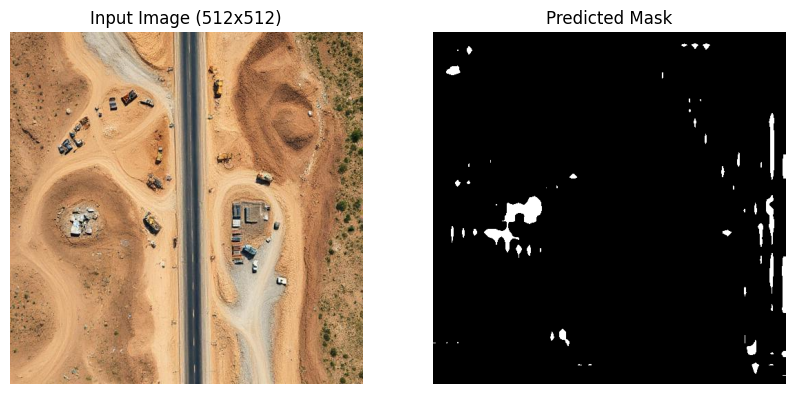

C:\Users\MY PC\AppData\Local\Temp\ipykernel_12128\139157435.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth', map_locat

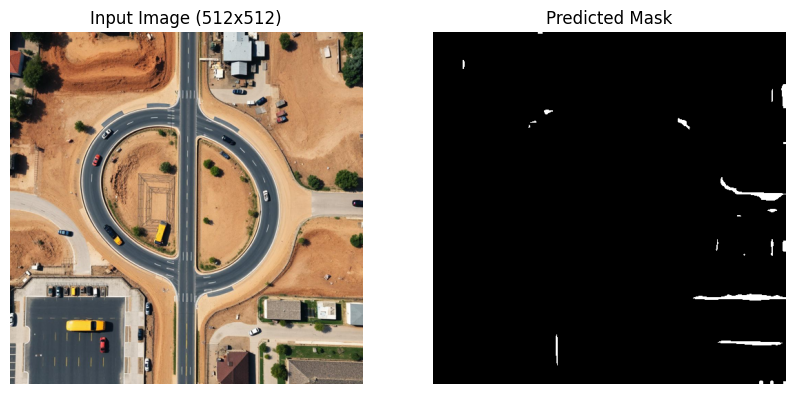

In [4]:
import cv2
import numpy as np

def calculate_brightness_contrast(image_path):
    # Load the image in grayscale mode
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Compute brightness (mean pixel intensity)
    brightness = np.mean(image)

    # Compute contrast (standard deviation of pixel intensities)
    contrast = np.std(image)

    print(f"Brightness: {brightness:.2f}")
    print(f"Contrast: {contrast:.2f}")

# Example usage
image_path =  r"C:\Users\MY PC\Downloads\try.png"
calculate_brightness_contrast(image_path)


Brightness: 81.25
Contrast: 40.03
